In [6]:
# Import Library
import os, re, string, pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import sklearn.metrics as metrics

In [7]:
# Input data dan menghapus data yg tidak digunakan
data = pd.read_csv("Text_Preprocessing.csv")
data =data.drop('Tweet Cleansing', axis=1)
data =data.drop('Tweet Tokenize', axis=1)
data =data.drop('Frekuensi Tweet', axis=1)
data =data.drop('Tweet Filtering', axis=1)
data =data.drop('Tweet Normalisasi', axis=1)
data =data.drop('Tweet Stemmed', axis=1)

In [8]:
# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000)

In [9]:
# Cek Data
data.tail(50)

,Unnamed: 0,Date,User,Tweet,Tweet Case Folding,Tweet Bersih
10859,35547,2022-08-21 02:29:29+00:00,nadiapurwati89,@Ristyan25825085 vaksinasi covid-19 sangat ber...,vaksinasi covid sangat berguna demi meningka...,vaksinasi covid guna tingkat imun tubuh nusant...
10860,35567,2022-08-21 02:19:14+00:00,Anggita_lung,Muncul subvarian BA.4. Epidemiologi jadi masa...,muncul subvarian ba epidemiologi jadi masala...,muncul subvarian ba epidemiologi abai prokes b...
10861,35574,2022-08-21 02:03:54+00:00,Ristyan25825085,Vaksinasi Covid-19 sangat penting untuk anak m...,vaksinasi covid sangat penting untuk anak mau...,vaksinasi covid anak orang dewasa sehat nusant...
10862,35576,2022-08-21 02:03:00+00:00,CahyaniIka3,Nusantara Jatidiri Bangsa\nVaksinasi untuk ceg...,nusantara jatidiri bangsa vaksinasi untuk cega...,nusantara jatidiri bangsa vaksinasi cegah seba...
10863,35577,2022-08-21 02:02:58+00:00,Ristyan25825085,Mari laksanakan vaksinasi dan disiplin jaga pr...,mari laksanakan vaksinasi dan disiplin jaga pr...,mari laksana vaksinasi disiplin jaga prokes pa...
10864,35583,2022-08-21 01:55:54+00:00,galerifitri,Cegah penularan covid-19 dg Terapkan Prokes 5 ...,cegah penularan covid dg terapkan prokes m ...,cegah tular covid terap prokes m vaksinasi taa...
10865,35586,2022-08-21 01:41:54+00:00,mas_prasetiyo,@GratisTerbaik Fix golput 2024. Apalagi parpol...,fix golput apalagi parpol yg jelas mendukun...,fix golput parpol dukung bijak wajib vaksinasi...
10866,35588,2022-08-21 01:38:33+00:00,Polreskubar1,"Kapolres Kutai Barat AKBP HERI RUSYAMAN S.I.K,...",kapolres kutai barat akbp heri rusyaman s i k ...,kapolres kuta barat akbp heri rusyaman s i k m...
10867,35590,2022-08-21 01:27:20+00:00,PolsekCangkuang,Bhabinkamtibmas Polsek Cangkuang Dampingi Team...,bhabinkamtibmas polsek cangkuang dampingi team...,bhabinkamtibmas polsek cangkuang damping team ...
10868,35591,2022-08-21 01:26:05+00:00,chinta_chintata,AYO TERAPKAN PROKES!\n\nDisiplin dalam mematuh...,ayo terapkan prokes disiplin dalam mematuhi d...,ayo terap prokes disiplin patuh jalan protokol...


In [10]:
data["Tweet Bersih"].values

array(['masyarakat imbau upaya cegah tular corona dengab terap protokol sehat endemicovid indonesiasehatindonesiahebat beritacovid ppkm',
       'saya males ospek offline anjirr ppkm lagi daring ptn',
       'wajar laba taun kemaren kena ppkm', ...,
       'terap prokes lingkup keluarga cegah tular covid m pakai masker jaga jarak cuci tangan hindar kerumun kurang mobilitas vaksinasi covid taatprokespakaimasker minggu hapsun',
       'kuatir lansia penuh syarat sehat vaksinasi covid vaksin covid kuat cegah mati lansia akibat covid taatprokespakaimasker',
       'vaksinasi dok hal covid vaksinasi berita santer'], dtype=object)

In [11]:
data = data.fillna(' ')

In [12]:
data.head(50)

,Unnamed: 0,Date,User,Tweet,Tweet Case Folding,Tweet Bersih
0,0,2022-08-10 08:06:32+00:00,erixgbaztiaan,Masyarakatnya Diimbau Untuk Tetap Berupaya Men...,masyarakatnya diimbau untuk tetap berupaya men...,masyarakat imbau upaya cegah tular corona deng...
1,1,2022-08-10 08:00:01+00:00,sbmptnfess,"gwe males ospek offline anjirr, kapan sih ppkm...",gwe males ospek offline anjirr kapan sih ppkm...,saya males ospek offline anjirr ppkm lagi dari...
2,2,2022-08-10 07:57:47+00:00,Zxhade1,"@Araghutama @KAI121 Ya wajar kalo laba naik, s...",ya wajar kalo laba naik secara taun kemaren ...,wajar laba taun kemaren kena ppkm
3,3,2022-08-10 07:54:17+00:00,KoramilKedawung,Anggota Koramil 05/Kedawung melaksanakan Giat ...,anggota koramil kedawung melaksanakan giat pa...,anggota koramil kedawung laksana giat patroli ...
4,4,2022-08-10 07:50:22+00:00,hajijooyeon,@miraclejooyeon Sedang ppkm alias planga plong...,sedang ppkm alias planga plongo kaya monyet,ppkm alias planga plongo kaya monyet
5,5,2022-08-10 07:49:54+00:00,txtbyna,@CocoCruchies @khairashh @hi_sseulduende @sbmp...,di lapangan maba nya ppkm planga plongo kay...,lapang maba ppkm planga plongo kaya monyet
6,7,2022-08-10 07:31:42+00:00,Zahrafaradl,bnran deh gr2 jarang aktif di grup kelompok bu...,bnran deh gr jarang aktif di grup kelompok bua...,bnran deh gr jarang aktif grup kelompok ppkm t...
7,8,2022-08-10 07:30:22+00:00,Lawakgaringg,RT @Lawakgaringg: Tetap waspada Pandemi Covid ...,tetap waspada pandemi covid berlum berakhir e...,waspada pandemi covid lum endemicovid indonesi...
8,13,2022-08-10 07:29:35+00:00,bingobravoo,@IndonesiaSehatt PPKM kali sangat dibutuh warg...,ppkm kali sangat dibutuh warga indonesia agar...,ppkm kali butuh warga indonesia varian
9,19,2022-08-10 07:27:57+00:00,koramil15jty2,"Koramil 15 Jatiyoso, pada hari Rabu 10 Agustus...",koramil jatiyoso pada hari rabu agustus pu...,koramil jatiyoso rabu agustus wib sertu eko pr...


In [13]:
# Transform Data untuk TF-IDF
word_tfidf = vectorizer_tfidf.fit_transform(data["Tweet Bersih"].values)
word_tfidf

<10909x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 106404 stored elements in Compressed Sparse Row format>

In [14]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names_out()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 10909
Jumlah fitur   = 1000


In [15]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {
        "nomor artikel": n + 1,
        "nilai TFIDF": highestTFIDFvalue,
        "top word": highestTFIDFword,
    }
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar
words_data = (
    pd.DataFrame({"Kata": words, "Banyak": n}).sort_values(by="Banyak", ascending=False).head(20)
)
words_data

,Kata,Banyak
63,ba,315
681,ppkm,292
600,orang,216
571,negara,89
30,anak,87
461,laksana,78
675,polwan,72
841,tasikmadu,55
343,jawa,54
749,saya,53


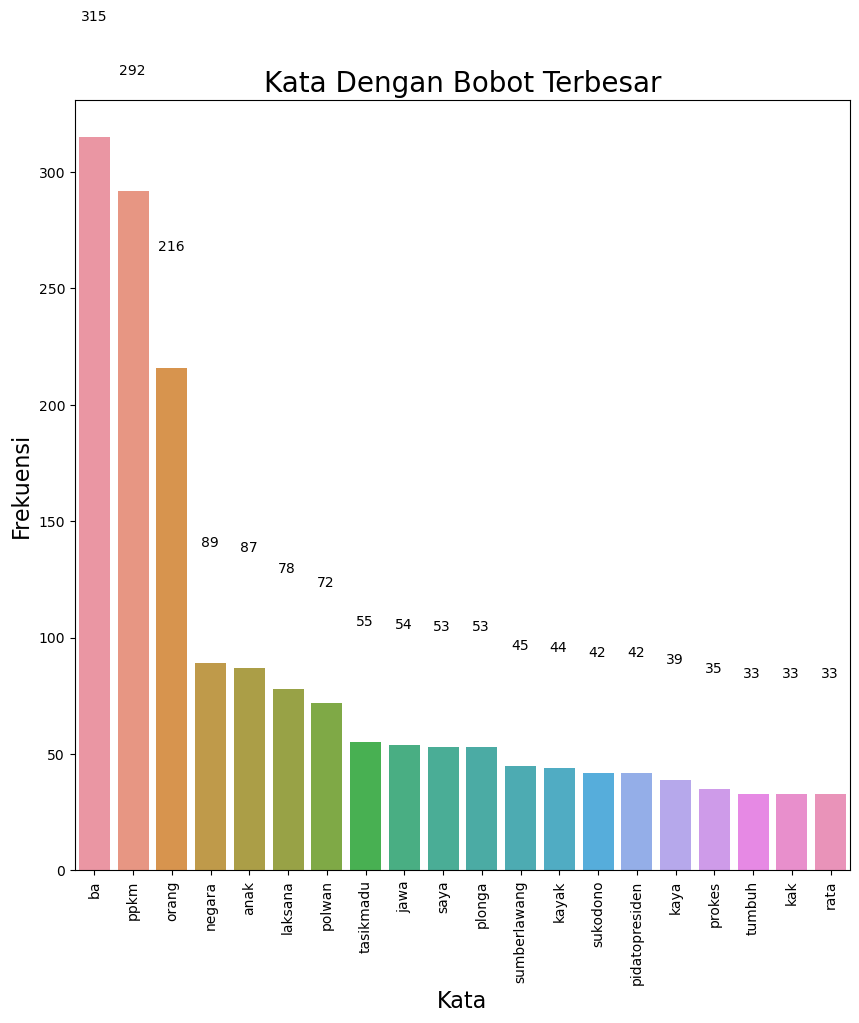

In [16]:
# Plotting Barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=words_data["Kata"], y=words_data["Banyak"])
for i, v in enumerate(words_data["Banyak"].tolist()):
    plt.text(i - len(str(v)) / 10 - 0.05, v + 50, str(v), fontsize=10)
plt.title("Kata Dengan Bobot Terbesar", fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Kata", fontsize=16)
plt.ylabel("Frekuensi", fontsize=16)
plt.show()

In [17]:
# Load Sample Data
sample1 = pd.read_csv("Data Sample.csv", dtype=str)
sample2 = pd.read_csv("Data Sample 2.csv", dtype=str)
sample = pd.concat([sample1, sample2], ignore_index=True)
data.tail()
sample = sample.fillna(' ')
sample.tail()

,Column,Date,User,Tweet,Tweet Bersih,Sentiment
2190,1093,2022-08-18 07:42:53+00:00,theaqyal,@tamim_pardede 2 anjing ini lebih mulia daripa...,anjing mulia koruptor bansos jabat keruk untun...,0
2191,1094,2022-08-26 07:51:53+00:00,mileap00,WEBINAR BARENG TAPI GAPUNYA TEMEN GW PPKM NGEN...,webinar bareng gapunya temen saya ppkm ngentot...,0
2192,1095,2022-08-30 02:55:45+00:00,Khojan7,"@liputan6dotcom @jokowi jangan lupa diri,presi...",lupa presiden ngangkat rakyat apbn duit rakyat...,0
2193,1096,2022-08-07 02:27:32+00:00,leavendourx,@awnyaii hah gila kl gue ppkm planga plongo ky...,hah gila kl saya ppkm planga plongo seperti mo...,0
2194,1097,2022-08-03 07:50:33+00:00,Riebellione,@Rakabasti KOK PPKM ANJING,ppkm anjing,0


In [18]:
# Split Data
x = vectorizer_tfidf.transform(sample["Tweet Bersih"].values)
y = sample["Sentiment"].values

In [19]:
# Split Data Training dan Test | Test 80% - Train 20%
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2022)

In [20]:
# Modelling SVM
from sklearn.svm import SVC
from sklearn.metrics import precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
classifiers = {
    "SVM": SVC(kernel="linear", probability=True, random_state=2020),
}
for name in classifiers.keys():
    classifiers[name].fit(x_train, y_train)
    y_pred = classifiers[name].predict(x_valid)
    print(f"Akurasi dari {name} : ", metrics.accuracy_score(y_valid, y_pred))
    print(f"Precision {name} : ", metrics.precision_score(y_valid,y_pred,labels=np.unique(y_pred), average='weighted'))
    print(f"Recall {name} : ", metrics.recall_score(y_valid, y_pred, average='weighted'))
    print(f"F1 {name} : ", metrics.f1_score(y_valid, y_pred, average='weighted'))

Akurasi dari SVM :  0.8451025056947609
Precision SVM :  0.8443217129549625
Recall SVM :  0.8451025056947609
F1 SVM :  0.840077837055157


In [21]:
print(classification_report(y_valid,y_pred,labels=np.unique(y_pred)))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62        32
           1       0.84      0.93      0.89       284
           2       0.87      0.72      0.79       123

    accuracy                           0.85       439
   macro avg       0.82      0.73      0.77       439
weighted avg       0.84      0.85      0.84       439



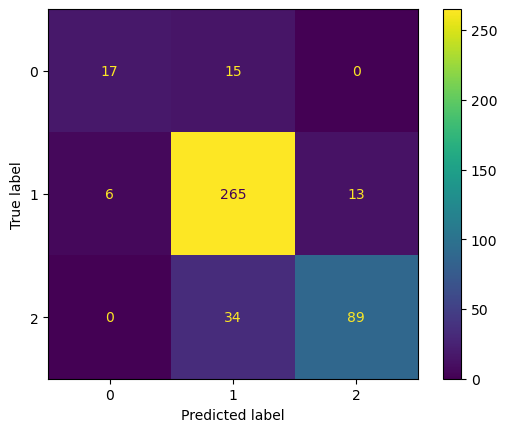

In [37]:
cm = confusion_matrix(y_valid, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.savefig("confusion_matrix_svm.png")